<a href="https://colab.research.google.com/github/Siyabonga22337669/Activity/blob/main/StudentHomework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


inserting the data set from the drive

In [ ]:
import zipfile
import os
zip_path = '/content/drive/My Drive/healthDataset.zip'
extract_path = '/content/healthDataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

    print("Extracted files:")
    print(os.listdir(extract_path))



Extracted files:
['appointments.csv', 'treatments.csv', 'patients.csv', 'billing.csv', 'doctors.csv']


In [ ]:
import os
import pandas as pd

files = os.listdir(extract_path)
print("Files found:", files)
csv_files = [f for f in files if f.endswith('.csv')]
print("CSV files:", csv_files)

dataframes = {}
for csv_file in csv_files:
    file_path = os.path.join(extract_path, csv_file)
    df_name = os.path.splitext(csv_file)[0]
    dataframes[df_name] = pd.read_csv(file_path)
    print(f"Loaded {csv_file} with shape {dataframes[df_name].shape}")

print(dataframes['appointments'].head())
print(dataframes['treatments'].head())
print(dataframes['patients'].head())
print(dataframes['billing'].head())
print(dataframes['doctors'].head())

Files found: ['appointments.csv', 'treatments.csv', 'patients.csv', 'billing.csv', 'doctors.csv']
CSV files: ['appointments.csv', 'treatments.csv', 'patients.csv', 'billing.csv', 'doctors.csv']
Loaded appointments.csv with shape (200, 7)
Loaded treatments.csv with shape (200, 6)
Loaded patients.csv with shape (50, 11)
Loaded billing.csv with shape (200, 7)
Loaded doctors.csv with shape (10, 8)
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Canc

Cleaning the data set

In [ ]:
for name, df in dataframes.items():
    print(f"--- {name.upper()} ---")
    print(df.info())
    print(df.head(), "\n")


--- APPOINTMENTS ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003   

Removing the duplicates

In [ ]:
for name, df in dataframes.items():
    before = df.shape[0]
    df.drop_duplicates(inplace=True)
    after = df.shape[0]
    print(f"{name}: Removed {before - after} duplicates")


appointments: Removed 0 duplicates
treatments: Removed 0 duplicates
patients: Removed 0 duplicates
billing: Removed 0 duplicates
doctors: Removed 0 duplicates


After removing the duplicates, Checking for missing values in this dataset

In [ ]:
for name, df in dataframes.items():
    print(f"{name} missing values:\n", df.isnull().sum(), "\n")


appointments missing values:
 appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64 

treatments missing values:
 treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64 

patients missing values:
 patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64 

billing missing values:
 bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64 

doctors missing values:
 doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience  

In [ ]:
for name, df in dataframes.items():
    print(f"{name} missing values:\n", df.isnull().sum(), "\n")
    for col in df.select_dtypes(include='object').columns:
        df[col].fillna("Unknown", inplace=True)
#Filling missing text with "Unknown"
    for col in df.select_dtypes(include=['int64','float64']).columns:
        df[col].fillna(df[col].mean(), inplace=True)
#Filling missing numeric values with mean.

appointments missing values:
 appointment_id      0
patient_id          0
doctor_id           0
appointment_date    0
appointment_time    0
reason_for_visit    0
status              0
dtype: int64 

treatments missing values:
 treatment_id      0
appointment_id    0
treatment_type    0
description       0
cost              0
treatment_date    0
dtype: int64 

patients missing values:
 patient_id            0
first_name            0
last_name             0
gender                0
date_of_birth         0
contact_number        0
address               0
registration_date     0
insurance_provider    0
insurance_number      0
email                 0
dtype: int64 

billing missing values:
 bill_id           0
patient_id        0
treatment_id      0
bill_date         0
amount            0
payment_method    0
payment_status    0
dtype: int64 

doctors missing values:
 doctor_id           0
first_name          0
last_name           0
specialization      0
phone_number        0
years_experience  

/tmp/ipython-input-1083755983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna("Unknown", inplace=True)
/tmp/ipython-input-1083755983.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Fixing the data types, converting date colomns.

In [ ]:
for name, df in dataframes.items():
    for col in df.columns:
        if "date" in col.lower():
            df[col] = pd.to_datetime(df[col], errors='coerce')


Standardising text data

In [ ]:
for name, df in dataframes.items():
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip().str.title()


Saving Cleaned files

In [ ]:
for name, df in dataframes.items():
    save_path = f'/content/drive/My Drive/{name}_cleaned.csv'
    df.to_csv(save_path, index=False)
    print(f"Saved cleaned {name} to {save_path}")


Saved cleaned appointments to /content/drive/My Drive/appointments_cleaned.csv
Saved cleaned treatments to /content/drive/My Drive/treatments_cleaned.csv
Saved cleaned patients to /content/drive/My Drive/patients_cleaned.csv
Saved cleaned billing to /content/drive/My Drive/billing_cleaned.csv
Saved cleaned doctors to /content/drive/My Drive/doctors_cleaned.csv


Checking the first fewq rows of the datasets

In [ ]:
for name, df in dataframes.items():
    print(f"\n--- {name.upper()} (First 5 rows) ---")
    print(df.head())



--- APPOINTMENTS (First 5 rows) ---
  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status  
0          Therapy  Scheduled  
1          Therapy    No-show  
2     Consultation  Cancelled  
3     Consultation  Cancelled  
4        Emergency    No-show  

--- TREATMENTS (First 5 rows) ---
  treatment_id appointment_id treatment_type         description     cost  \
0         T001           A001   Chemotherapy     Basic screening  3941.97   
1         T002           A002            MRI   Advanced protocol  4158.44   
2         T003           A003            MRI  Standard

Searching for Relations in the Dataset

In this section, we will search the dataset for specific relationships between nodes.  


Looking at the colomn names

In [ ]:
for name, df in dataframes.items():
    print(f"\n{name.upper()} columns: {df.columns.tolist()}")



APPOINTMENTS columns: ['appointment_id', 'patient_id', 'doctor_id', 'appointment_date', 'appointment_time', 'reason_for_visit', 'status']

TREATMENTS columns: ['treatment_id', 'appointment_id', 'treatment_type', 'description', 'cost', 'treatment_date']

PATIENTS columns: ['patient_id', 'first_name', 'last_name', 'gender', 'date_of_birth', 'contact_number', 'address', 'registration_date', 'insurance_provider', 'insurance_number', 'email']

BILLING columns: ['bill_id', 'patient_id', 'treatment_id', 'bill_date', 'amount', 'payment_method', 'payment_status']

DOCTORS columns: ['doctor_id', 'first_name', 'last_name', 'specialization', 'phone_number', 'years_experience', 'hospital_branch', 'email']


Checking for unique IDs (Primary keys)

In [ ]:
for name, df in dataframes.items():
    for col in df.columns:
        if df[col].is_unique:
            print(f"{col} could be a PRIMARY KEY in {name}")


appointment_id could be a PRIMARY KEY in appointments
treatment_id could be a PRIMARY KEY in treatments
appointment_id could be a PRIMARY KEY in treatments
cost could be a PRIMARY KEY in treatments
patient_id could be a PRIMARY KEY in patients
contact_number could be a PRIMARY KEY in patients
registration_date could be a PRIMARY KEY in patients
insurance_number could be a PRIMARY KEY in patients
bill_id could be a PRIMARY KEY in billing
treatment_id could be a PRIMARY KEY in billing
amount could be a PRIMARY KEY in billing
doctor_id could be a PRIMARY KEY in doctors
phone_number could be a PRIMARY KEY in doctors
email could be a PRIMARY KEY in doctors


Checking for shared IDs(Foreign Keys)

In [ ]:
# Checking how many patient_ids match between patients and appointments
common_patients = set(dataframes['appointments']['patient_id']).intersection(
                  set(dataframes['patients']['patient_id']))
print(f"Matching patient_ids: {len(common_patients)}")


Matching patient_ids: 48


Creating the entity relationship chart

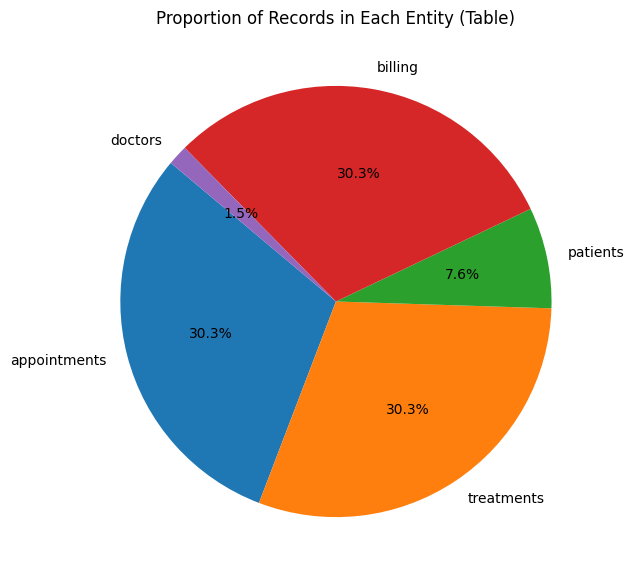

In [ ]:
import matplotlib.pyplot as plt

# Example: number of rows in each dataframe (entity)
entity_counts = {name: df.shape[0] for name, df in dataframes.items()}

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(entity_counts.values(), labels=entity_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Records in Each Entity (Table)')
plt.show()


Random forest

we are going to pick one dataframe, i will start by searching for perfect target        

In [ ]:
print(df.columns)
print(df.head())


Index(['doctor_id', 'first_name', 'last_name', 'specialization',
       'phone_number', 'years_experience', 'hospital_branch', 'email'],
      dtype='object')
  doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   
2      D003       Jane     Smith     Pediatrics    8737740598   
3      D004      David     Jones     Pediatrics    6594221991   
4      D005      Sarah    Taylor    Dermatology    9118538547   

   years_experience   hospital_branch                         email  
0                17   Westside Clinic  dr.david.taylor@hospital.com  
1                24   Eastside Clinic    dr.jane.davis@hospital.com  
2                19   Eastside Clinic    dr.jane.smith@hospital.com  
3                28  Central Hospital   dr.david.jones@hospital.com  
4                26  Central Hospital  dr.sarah.taylor@hospital.com  


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Copy the billing DataFrame
df = dataframes['billing'].copy()

# Target column
target_col = 'payment_method '


df = df.dropna(subset=[target_col])

# Features and target
X = df.drop(columns=[target_col])
y = df[target_col]

# Handle missing values in features
X = X.fillna(method='ffill').fillna(method='bfill')

# Convert categorical variables to dummies
X = pd.get_dummies(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# --- Logistic Regression ---
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))
print("Classification Report:\n", classification_report(y_test, lr_pred))


KeyError: ['payment_method ']